In [117]:
!pip install kss

In [224]:
# 필요한 nltk 라이브러리 다운로드 
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ck12q\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\ck12q\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ck12q\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ck12q\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ck12q\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [4]:
re.__version__

'2.2.1'

In [5]:
konlpy.__version__

'0.6.0'

In [6]:
nltk.__version__

'3.7'

In [10]:
sklearn.__version__

'1.1.1'

In [12]:
pd.__version__

'1.4.3'

In [13]:
np.__version__

'1.21.5'

In [16]:
matplotlib.__version__

'3.5.1'

In [17]:
sns.__version__

'0.11.2'

In [19]:
platform.__version__

'1.0.8'

In [15]:
import matplotlib

In [9]:
import sklearn
import re
import konlpy
import nltk
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들을 사전에서 제외함
from nltk.tokenize import word_tokenize, RegexpTokenizer
from konlpy.tag import Okt, Kkma, Mecab, Hannanum, Komoran
import kss
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import collections
import matplotlib.pyplot as plt 
import seaborn as sns 
import platform 
import operator
from matplotlib import font_manager, rc 

%matplotlib inline 

path = "C:\Windows\Fonts\malgun.ttf"

if platform.system() == "Darwin" : 
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows" : 
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else : 
    print("Unknown system. sorry")

In [399]:
# txt 파일이 줄글 형태로 된 경우 
f = open('text_corpus.txt', 'r')
data = f.read().splitlines()
# print(data)
print(len(data))

1560


In [400]:
data

['기관의 커넥팅 로드가 부러질 경우 직접 영향을 받는 곳은?',
 '압력의 단위가 아닌 것은?',
 '실린더헤드 등 면적이 넓은 부분에서 볼트를 조이는 방법으로 맞는 것은?',
 '직접 분사식 엔진의 장점 중 틀린 것은?',
 '분사펌프의 플런저와 배럴 사이의 윤활은?',
 '디젤기관의 노킹 방지책으로 틀린 것은?',
 '라디에이터 캡을 열었을 때 냉각수에 오일이 섞여있는 경우의 원인은?',
 '압력식 라디에이터 캡에 대한 설명으로 적합한 것은?',
 '윤활유 사용 방법으로 옳은 것은?',
 '오일량은 정상이나 오일압력계의 압력이 규정치보다 높을 경우 조치사항 중 옳은 것은?',
 '공기청정기의 설치 목적은?',
 '발전기에서 발생되는 유도기전력의 크기와 관계없는 것은?',
 '건설기계장비에서 발전기는 어떤 발전기를 주로 사용하고 있는가?',
 '다음의 조명에 관련된 용어의 설명으로 틀린 것은?',
 '예열플러그가 15∼20초에서 완전히 가열되었을 경우 가장 적절한 것은?',
 '전해액을 만들 때 어떻게 하여야 하는가?',
 '축전지의 충방전 작용은?',
 '굴삭기의 조종레버 중 굴삭작업과 직접 관계가 없는 것은?',
 '무한궤도식 굴삭기 트랙의 조정은 어느 것으로 하는가?',
 '지게차의 앞바퀴는 어디에 설치되는가?',
 '지게차를 주차시킬 때 포크의 적당한 위치는?',
 '스크레이퍼 굴착 작업시 견인력을 증가시키기 위해 밀어 주는 작업은?',
 '트랜스미션에서 잡음이 심할 경우 운전자가 가장 먼저 확인해야 할 사항은?',
 '타이어에 9.00-20-14PR 로 표시된 경우 20이 의미하는 것은?',
 '작업 중 충전계에 빨간불이 들어오는 경우는?',
 '불도우저가 진흙에 트랙 일부가 묻힐 정도로 빠진 경우, 진흙에서 벗어나는 방법으로 가장 거리가 먼 것은?',
 '건설기계 신규등록검사를 실시할 수 있는 자는?',
 '정기 검사대상 건설기계의 정기검사 신청기간 중 맞는 것은?',
 '건설기계조종사 면허가 취소되었을 경우 그 사유가 발생한 날로부터 며칠이내에

In [258]:
eng_voc_set = set()

eng_stopwords = set(stopwords.words('english'))

for d in data :
    tokenizer_express = RegexpTokenizer("[a-zA-Z]{3,}")
#     print(tokenizer_express.tokenize(d.lower()))
    
    token = tokenizer_express.tokenize(d.lower()) # word_tokenize로 토큰화
#     eng_voc_set.update(token)
#     result = [word for word in token if word not in eng_stopwords]
    
    eng_voc_set.update(token)

In [406]:
document = ['AC 발전기에서 전류가 발생되는 것은?']

for d in document : 
    tokenizer_express = RegexpTokenizer("[a-zA-Z]+")
    token = tokenizer_express.tokenize(d.lower())
    
    print(token)

['ac']


In [274]:
stop_lst = []

for eng in eng_voc_set : 
#     print(re.search(r"[A-Z]+", eng), eng)
    if re.search(r"[A-Z]+", eng) != None : 
        stop_lst.append(eng)
        
print(stop_lst)

['Maintenance', 'ILO', 'Turbo', 'Free', 'LNG', 'MOTOR', 'Full', 'RPM', 'GPM', 'PLP', 'Low', 'Grow', 'GRADER', 'MPa', 'Arm', 'Fluid', 'NOx']


In [62]:
hannanum = Hannanum()
komoran = Komoran()
okt = Okt()
mecab = Mecab(dicpath = r'C:\mecab\mecab-ko-dic')
kkma = Kkma() 

In [138]:
morphs_dict = {'hannanum' : hannanum, 'komoran' : komoran, 'okt' : okt, 'mecab' : mecab, 'kkma' : kkma}

for key, value in morphs_dict.items() : print(f'{key} : ', value.pos('아버지가방에들어가신다'), end = '\n\n')

hannanum :  [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

komoran :  [('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]

okt :  [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

mecab :  [('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]

kkma :  [('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]



In [58]:
def euclidean_distance(A, B):   
    return np.sqrt(np.sum((A-B)**2))

In [393]:
morphs_text_lst

['기관 의 커넥팅 로드 가 부러질 경우 직접 영향 을 받는 곳 은 ?',
 '압력 의 단위 가 아닌 것 은 ?',
 '실린더헤드 등 면적 이 넓은 부분 에서 볼트 를 조이는 방법 으로 맞는 것 은 ?',
 '직접 분사 식 엔진 의 장점 중 틀린 것 은 ?',
 '분사 펌프 의 플런저 와 배럴 사이 의 윤활 은 ?',
 '디젤기관 의 노킹 방지책 으로 틀린 것 은 ?',
 '라디에이터 캡 을 열었을 때 냉각수 에 오일이 섞여있는 경우 의 원인 은 ?',
 '압력 식 라디에이터 캡 에 대한 설명 으로 적합한 것 은 ?',
 '윤활유 사용 방법 으로 옳은 것 은 ?',
 '오 일 량 은 정상 이나 오 일 압력계 의 압력 이 규 정치 보다 높을 경우 조치 사항 중 옳은 것 은 ?',
 '공기청정기 의 설치 목적 은 ?',
 '발전기 에서 발생 되는 유도기 전력 의 크기 와 관계 없는 것 은 ?',
 '건설 기계 장비 에서 발전기 는 어떤 발전기 를 주로 사용 하고 있는가 ?',
 '다음 의 조명 에 관련 된 용어 의 설명 으로 틀린 것 은 ?',
 '예 열 플러그 가 15 ∼ 20초 에서 완전히 가열 되었을 경우 가장 적절한 것 은 ?',
 '전해 액 을 만들 때 어떻게 하여야 하는가 ?',
 '축전지 의 충 방전 작용 은 ?',
 '굴삭기 의 조종 레버 중 굴삭 작업 과 직접 관계 가 없는 것 은 ?',
 '무한궤도 식 굴삭기 트랙 의 조정은 어느 것 으로 하는가 ?',
 '지게차 의 앞 바퀴 는 어디 에 설치되 는가 ?',
 '지게차 를 주차 시킬 때 포크 의 적당한 위치 는 ?',
 '스크레이퍼 굴착 작업 시 견인 력 을 증가 시키기 위해 밀어 주는 작업 은 ?',
 '트랜스미션 에서 잡음 이 심할 경우 운전자 가 가장 먼저 확인 해야 할 사항 은 ?',
 '타이어 에 9.00 - 20-14 PR 로 표시 된 경우 20 이 의미 하는 것 은 ?',
 '작업 중 충전 계 에 빨간 불 이 들어오는 경우 는 ?',
 '불 도우 저가 진흙 에 트랙 일부 가 묻힐 정도

In [209]:
voca = set()
morphs_text_lst = []
morphs_voca = set()

for d in data : 
    text_lst = okt.morphs(d)
    
    morphs_text = ' '.join(text_lst)
    morphs_text_lst.append(morphs_text)
    
    for pos in okt.pos(d) : 
        if pos[1] == 'Noun' : 
            voca.add(pos)
    
print(len(voca))

for d in morphs_text_lst : 
    for pos in okt.pos(d) : 
        if pos[1] == 'Noun' : 
            morphs_voca.add(pos)
        
print(len(morphs_voca))

1493
1503


In [210]:
morphs_voca.difference(voca)

{('게', 'Noun'),
 ('경', 'Noun'),
 ('계', 'Noun'),
 ('공', 'Noun'),
 ('급', 'Noun'),
 ('덤프', 'Noun'),
 ('레드', 'Noun'),
 ('만', 'Noun'),
 ('매', 'Noun'),
 ('맥', 'Noun'),
 ('모', 'Noun'),
 ('반', 'Noun'),
 ('사', 'Noun'),
 ('석기', 'Noun'),
 ('성', 'Noun'),
 ('쇄', 'Noun'),
 ('순', 'Noun'),
 ('스플라', 'Noun'),
 ('식', 'Noun'),
 ('십', 'Noun'),
 ('액슬', 'Noun'),
 ('여', 'Noun'),
 ('연', 'Noun'),
 ('예', 'Noun'),
 ('오', 'Noun'),
 ('온', 'Noun'),
 ('요', 'Noun'),
 ('이나', 'Noun'),
 ('이지', 'Noun'),
 ('인', 'Noun'),
 ('작', 'Noun'),
 ('저', 'Noun'),
 ('조', 'Noun'),
 ('처럼', 'Noun'),
 ('첵', 'Noun'),
 ('하니', 'Noun')}

In [211]:
voca.difference(morphs_voca)

{('덤프트럭', 'Noun'),
 ('동', 'Noun'),
 ('드래', 'Noun'),
 ('맥동', 'Noun'),
 ('쇄석기', 'Noun'),
 ('스플라인', 'Noun'),
 ('액슬허브', 'Noun'),
 ('어큐뮬레이터', 'Noun'),
 ('오픈렌치', 'Noun'),
 ('웨이트', 'Noun'),
 ('유압계통', 'Noun'),
 ('유압기계', 'Noun'),
 ('유압기기', 'Noun'),
 ('유압기호', 'Noun'),
 ('유압모터', 'Noun'),
 ('유압오일', 'Noun'),
 ('유압장치', 'Noun'),
 ('유압탱크', 'Noun'),
 ('유압펌프', 'Noun'),
 ('유압호스', 'Noun'),
 ('유압회로', 'Noun'),
 ('첵밸브', 'Noun'),
 ('트레드', 'Noun'),
 ('하강량', 'Noun'),
 ('휠로더', 'Noun'),
 ('휠허브', 'Noun')}

In [344]:
'ABCC'.lower

<function str.lower()>

In [351]:
euclidean_distances([[6, 6]], [[2, 2]])

array([[5.65685425]])

In [352]:
cosine_similarity([[6, 6]], [[2, 2]])

array([[1.]])

In [419]:
# 말뭉치, 형태소 분석기, 형태소 품사 필터링 리스트, 벡터라이즈, 실험용 텍스트, 유사도 분석 + 영어가 섞인 문제에 대한 처리도 수행

voca = set()

def eng_vectorize_sim(data, konlpy, pos_lst, vector, new_text) : 
    
    global voca, stop_lst
    
    if len(voca) >= 1 :
        voca = set()
    
    morphs_text_lst = []
    
    # 품사 태깅 관련 코드 
    tag_set = set()
    
#     eng_voc_set = set()

#     eng_stopwords = set(stopwords.words('english'))
    
    for d in data : 
#         text_lst = konlpy.morphs(d)
        
        for tag in konlpy.pos(d) : 
            if pos_lst == [] : 
                tag_set.add(tag)
                voca.add(tag[0].lower())
            elif pos_lst != [] and tag[1] in pos_lst :
                tag_set.add(tag)
                voca.add(tag[0].lower())
                
        tokenizer_express = RegexpTokenizer("[a-zA-Z]{3,}")
        token = tokenizer_express.tokenize(d.lower()) # word_tokenize로 토큰화, 소문자로 처리
        voca.update(token)
     
                
#         morphs_text = ' '.join(text_lst)
#         morphs_text_lst.append(morphs_text)
        
    print('형태소 기준 태그 셋 : ', len(voca))
    
    token_tag_dict = collections.Counter([tag[1] for tag in tag_set])
    token_tag_dict = collections.OrderedDict(token_tag_dict.most_common())
    print(token_tag_dict)
    
    names = list(token_tag_dict.keys())
    values = list(token_tag_dict.values())
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(token_tag_dict)),values,tick_label=names)
    plt.xticks(rotation = 45)
    
    for i, b in enumerate(bars):
        plt.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            values[i],ha='center',fontsize=12)
    
    '''
    plt.bar(0,values[0],tick_label=names[0])
    plt.bar(1,values[1],tick_label=names[1])
    plt.bar(2,values[2],tick_label=names[2])
    '''
#     plt.savefig('fruit.png')
    plt.show()
    
    
    
    vectorizer = vector
    exam_dtm = vectorizer.fit_transform(data) # data
    
    print('DFM :', exam_dtm.shape)
    print(vectorizer.get_feature_names_out()[:1000])
    new = new_text
    

    
#     test_data = []

#     for text in new_text :
#         morphs_text_lst = konlpy.morphs(text)
#         morphs_text = ' '.join(morphs_text_lst)
#         test_data.append(morphs_text)
    
    exam_test_dtm = vectorizer.transform(new_text)
    
    cosine_sim = cosine_similarity(exam_dtm, exam_test_dtm)
    euclidean_distances_array = []

    for i in range(tfidf_vector.shape[0]) :
        euclidean_distances = euclidean_distance(exam_dtm.toarray()[i], exam_test_dtm.toarray())
        euclidean_distances_array.append(euclidean_distances)
    
    euclidean_distances_array = np.array(euclidean_distances_array).reshape(-1, 1)

    print('코사인 유사도 연산 결과 :', cosine_sim.shape)
    print('유클리디안 거리 연산 결과 :', euclidean_distances_array.shape, end ='\n\n')

    # np.concatenate((cosine_sim, euclidean_distances), axis = 0)

    cosine_df = pd.DataFrame(cosine_sim, columns=['코사인 유사도'])
    euclidean_df = pd.DataFrame(euclidean_distances_array, columns=['유클리디안 거리'])
    
    cosine_df['문서'] = [data[cosine_df.index[i]] for i in range(len(cosine_df))]
    cosine_df = cosine_df.sort_values(by = '코사인 유사도',ascending=False)
    
    euclidean_df = euclidean_df.sort_values(by = '유클리디안 거리',ascending=True)
    euclidean_df['문서'] = [data[euclidean_df.index[i]] for i in range(len(euclidean_df))]
    
    return pd.concat([cosine_df, euclidean_df], axis = 1)

In [197]:
def my_tokenizer(doc) : 
    return [
        token for token, pos in okt.pos(doc) if pos in ['Noun']
    ]

In [362]:
okt.pos('라디에이터 캡의 스프링이 파손 되었을 때 가장 먼저 나타나는 현상은?')

[('라디에이터', 'Noun'),
 ('캡', 'Noun'),
 ('의', 'Josa'),
 ('스프링', 'Noun'),
 ('이', 'Josa'),
 ('파손', 'Noun'),
 ('되었을', 'Verb'),
 ('때', 'Noun'),
 ('가장', 'Noun'),
 ('먼저', 'Noun'),
 ('나타나는', 'Verb'),
 ('현상', 'Noun'),
 ('은', 'Josa'),
 ('?', 'Punctuation')]

In [403]:
def my_tokenizer(doc) : 
    return [
        token for token, pos in okt.pos(doc) if pos in ['Noun']
    ]

In [ ]:
voca = ['']

TfidfVectorizer(vocabulary=voca)

형태소 기준 태그 셋 :  1830
OrderedDict([('Noun', 1493), ('Verb', 304)])


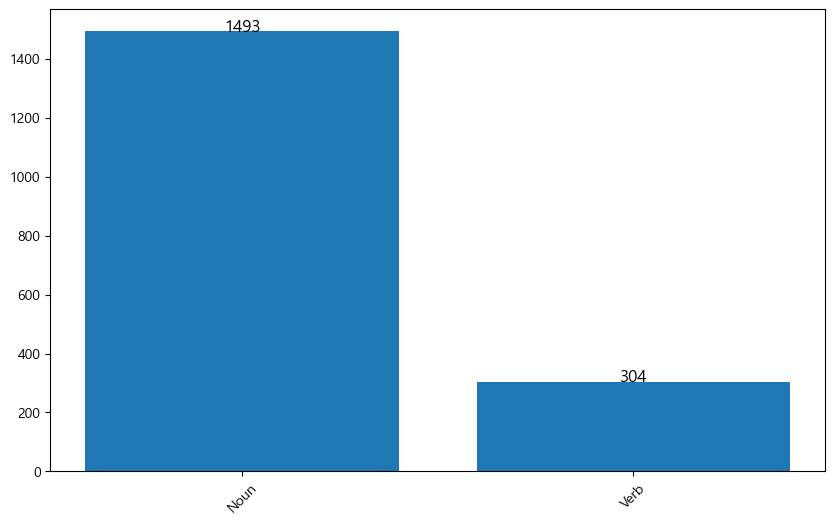

DFM : (1560, 1830)
['actuator' 'alternator' 'arm' 'charger' 'comp' 'coupling' 'crank'
 'cylinder' 'driver' 'fire' 'flow' 'fluid' 'free' 'full' 'gpm' 'grader'
 'grow' 'ilo' 'key' 'lng' 'low' 'maintenance' 'mesh' 'miss' 'motor' 'mpa'
 'nox' 'plp' 'pressure' 'rpm' 'shaft' 'surge' 'turbo' '가' '가고' '가공' '가까이'
 '가는' '가는데' '가능' '가동' '가득' '가루' '가변' '가속' '가스' '가시거리' '가압' '가에' '가연성' '가열'
 '가이드' '가장' '가장자리' '가져야' '가지' '가진' '가파른' '가하면' '가해진' '가했을' '각' '각각' '각도'
 '각종' '간' '간격' '간극' '감소' '감속' '감시' '감전' '감전사' '갑자기' '강관' '강산' '갖는' '갖추고'
 '갖추어야' '갖춘' '개' '개선' '개소' '개시' '개조' '개폐' '거나' '거래' '거리' '거부' '거의' '거쳐'
 '거품' '건' '건널목' '건설' '건축물' '걸때' '걸렸을' '걸릴' '걸어야' '걸이' '검사' '검인' '것' '게이지'
 '겨울철' '격' '견딜' '견인' '결과' '결부' '결정' '결함' '겹' '겹친' '경계' '경고' '경고표지' '경과'
 '경보기' '경사' '경사면' '경사지에서' '경상' '경우' '경유' '경찰' '경찰관' '경찰서' '계기' '계단' '계속'
 '계약' '계통' '고' '고등' '고려' '고무' '고발' '고속도로' '고압' '고유' '고의' '고장' '고장원' '고정'
 '고착' '곡선' '골격' '곳' '공구' '공급' '공기' '공기청정기' '공동' '공동현' '공무원' '공사' '공유' '공장'
 '과' '과도' '과부' '과실' '과열' '과정' '과태료

,코사인 유사도,문서,유클리디안 거리,문서
1081,0.663742,디젤기관에서 실화할 때 나타나는 현상으로 옳은?,0.820071,디젤기관에서 실화할 때 나타나는 현상으로 옳은?
7,0.625527,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?,0.865417,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?
303,0.625527,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?,0.865417,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?
1263,0.595752,라디에이터 캡의 스프링이 파손 되었을 때 가장 먼저 나타나는 현상은?,0.899165,라디에이터 캡의 스프링이 파손 되었을 때 가장 먼저 나타나는 현상은?
1455,0.466887,축전지 터미널에 부식이 발생하였을 때 나타나는 현상과 가장거리가 먼 것은?,1.032582,축전지 터미널에 부식이 발생하였을 때 나타나는 현상과 가장거리가 먼 것은?
...,...,...,...,...
521,0.000000,오일의 압력이 낮아지는 원인이 아닌 것은?,1.414214,오일의 압력이 낮아지는 원인이 아닌 것은?
520,0.000000,압력제어 밸브는 어느 위치에서 작동하는가?,1.000000,압력제어 밸브는 어느 위치에서 작동하는가?
519,0.000000,다음에서 가장 높은 압력을 발생시키는 유압펌프의 형식은?,1.414214,다음에서 가장 높은 압력을 발생시키는 유압펌프의 형식은?
518,0.000000,호이스트형 유압호스 연결부분에 가장 많이 사용하는 것은?,1.414214,호이스트형 유압호스 연결부분에 가장 많이 사용하는 것은?


In [418]:
new_text = ['라디에이터 캡의 압력스프링 장력이 약화되었을 때 나타나는 현상은?']

voca = set()

vectorize_sim_df = eng_vectorize_sim(data, okt, ['Noun', 'Verb'], TfidfVectorizer(vocabulary=voca), new_text) 
vectorize_sim_df

In [430]:
len(voca)

1334

형태소 기준 태그 셋 :  1904
OrderedDict([('NNG', 1301), ('VV', 108), ('NNP', 64), ('VV+ETM', 61), ('SL', 53), ('MAG', 50), ('EC', 40), ('VV+EC', 26), ('NNBC', 24), ('SN', 24), ('MM', 23), ('VA', 22), ('XSN', 20), ('VA+ETM', 18), ('XR', 17), ('NNB', 16), ('JKB', 15), ('VV+EP', 13), ('VX', 12), ('JX', 9), ('NP', 8), ('NR', 8), ('SY', 8), ('XPN', 7), ('XSV+ETM', 7), ('XSV+EC', 6), ('EP', 5), ('IC', 5), ('JC', 5), ('ETM', 5), ('XSV', 4), ('VX+ETM', 4), ('XSA+EC', 4), ('VA+EC', 4), ('MAJ', 3), ('SSO', 3), ('EF', 3), ('SC', 3), ('SSC', 3), ('JKC', 2), ('VV+EC+VX+ETM', 2), ('JKS', 2), ('JKO', 2), ('VCP+ETM', 2), ('EP+ETM', 2), ('VCP+EC', 2), ('VX+EC', 2), ('XSA', 2), ('UNKNOWN', 2), ('ETN', 2), ('NNG+JC', 1), ('VV+EC+VX+EP', 1), ('NNB+JKO', 1), ('XSA+ETM', 1), ('JKG', 1), ('VX+EP', 1), ('VCN+ETM', 1), ('VCP+EF', 1), ('SF', 1), ('XSA+EF', 1), ('XSV+ETN', 1), ('XSV+EP', 1), ('VCP', 1), ('EP+EC', 1), ('VA+EC+VX+EC', 1), ('EC+JX', 1), ('VV+EC+VX+EC', 1), ('XSN+VCP+ETM', 1), ('NP+JX', 1), ('VX+ETN', 1), (

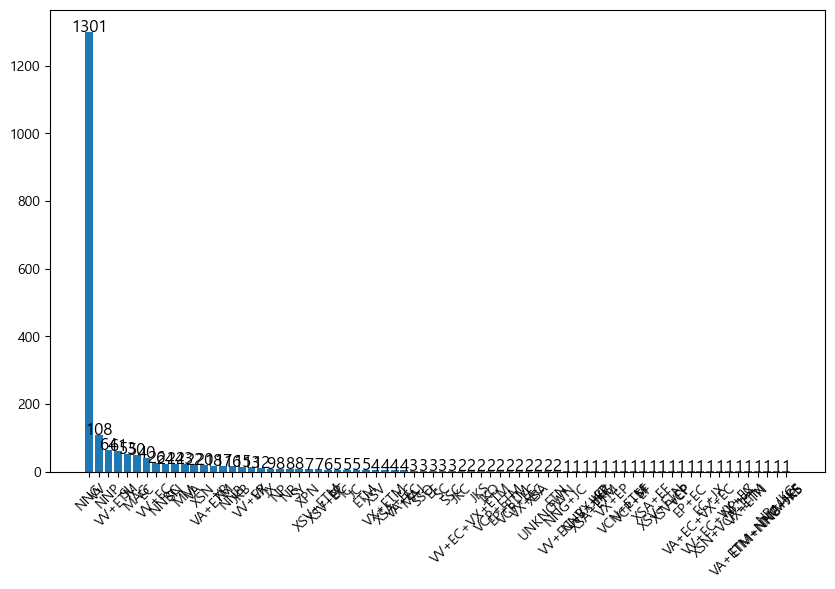

DFM : (1560, 1904)
['"' '(' ')' ',' '-' '-)' '.' '/' '0' '00' '1' '10' '100' '12' '14' '15'
 '154' '2' '20' '22' '24' '280' '3' '30' '4' '4000' '45' '5' '50' '6' '8'
 '9' '?' '[' ']' 'a' 'ac' 'actuator' 'alternator' 'arm' 'b' 'charger' 'cm'
 'comp' 'coupling' 'crank' 'cylinder' 'de' 'driver' 'fire' 'flow' 'fluid'
 'free' 'full' 'gpm' 'grader' 'grow' 'h' 'ilo' 'key' 'kg' 'km' 'kv' 'kw'
 'lng' 'low' 'lp' 'm' 'maintenance' 'mesh' 'mf' 'miss' 'motor' 'mpa' 'nox'
 'on' 'plp' 'pr' 'pressure' 'rpm' 'shaft' 'st' 'surge' 'turbo' 'v' '°' '·'
 'θ' '“' '”' '℃' '∼' 'ㆍ도지사는' 'ㆍ정지처분' '가' '가공' '가까이' '가능' '가동' '가득' '가루'
 '가변' '가속' '가스' '가시거리' '가압' '가연' '가열' '가이드' '가장' '가장자리' '가져야' '가지' '가진'
 '가파른' '가하' '가해진' '가했' '각' '각각' '각도' '각종' '간' '간격' '간극' '감소' '감속' '감속기'
 '감시' '감전' '갑자기' '강관' '강산' '강할' '갖' '갖추' '갖춘' '같' '같이' '개' '개부' '개선' '개소'
 '개시' '개조' '개폐' '거나' '거래' '거리' '거리가' '거부' '거의' '거쳐' '거품' '건널목' '건설' '건설기계'
 '건식' '건축물' '걸' '걸때' '걸렸' '걸릴' '걸어야' '걸이' '검사' '검사소' '검인' '것' '게' '게이지'
 '겠' '겨울철' '견딜' '견인' '견인력

,코사인 유사도,문서,유클리디안 거리,문서
6,1.000000,라디에이터 캡을 열었을 때 냉각수에 오일이 섞여있는 경우의 원인은?,0.000000,라디에이터 캡을 열었을 때 냉각수에 오일이 섞여있는 경우의 원인은?
1203,1.000000,라디에이터 캡을 열었을 때 냉각수에 오일이 섞여있는 경우는 원인은?,0.000000,라디에이터 캡을 열었을 때 냉각수에 오일이 섞여있는 경우는 원인은?
1084,0.707107,기관이 작동 중 라디에이터 캡 쪽으로 물이 상승하면서 연소가스가 누출될 때의 원인에...,1.000000,기관이 작동 중 라디에이터 캡 쪽으로 물이 상승하면서 연소가스가 누출될 때의 원인에...
303,0.707107,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?,1.000000,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?
7,0.707107,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?,1.000000,압력식 라디에이터 캡에 대한 설명으로 적합한 것은?
...,...,...,...,...
519,0.000000,다음에서 가장 높은 압력을 발생시키는 유압펌프의 형식은?,1.414214,다음에서 가장 높은 압력을 발생시키는 유압펌프의 형식은?
518,0.000000,호이스트형 유압호스 연결부분에 가장 많이 사용하는 것은?,1.732051,호이스트형 유압호스 연결부분에 가장 많이 사용하는 것은?
517,0.000000,유압탱크의 구비조건이 아닌 것은?,1.414214,유압탱크의 구비조건이 아닌 것은?
516,0.000000,밀폐된 용기 내의 일부에 가해진 압력은 어떻게 전달되는가?,2.000000,밀폐된 용기 내의 일부에 가해진 압력은 어떻게 전달되는가?


In [432]:
new_text = ['라디에이터 캡의 압력스프링 장력이 약화되었을 때 나타나는 현상은?']

voca = set()

vectorize_sim_df = eng_vectorize_sim(data, mecab, [], CountVectorizer(vocabulary=voca), new_text) 
vectorize_sim_df